In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(['PassengerId','Name','Ticket'] ,axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [4]:
dftypes = df.dtypes
n_unique = df.nunique()
pd.DataFrame({"Dtypes" : dftypes,"Num_Unique" : n_unique}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,str,float64,int64,int64,float64,str,str
Num_Unique,2,3,2,88,7,7,248,147,3


In [5]:
# def chk(df):
#     dftypes = df.dtypes
#     n_unique = df.nunique()
#     return pd.DataFrame({"Dtypes" : dftypes,"Num_Unique" : n_unique}).T

In [6]:
# chk(df)

In [7]:
from peprocessing import chk
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,int64,int64,str,float64,int64,int64,float64,str,str
Num_Unique,2,3,2,88,7,7,248,147,3


In [8]:
cols = ['Survived' , 'Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked']
df[cols] = df[cols].astype('category')


In [9]:
chk(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Dtypes,category,category,category,float64,category,category,float64,str,category
Num_Unique,2,3,2,88,7,7,248,147,3


Make function change the data type

In [10]:
""" def chng_type():
    df[cols] = df[cols].astype('category') """

" def chng_type():\n    df[cols] = df[cols].astype('category') "

In [11]:
df.shape

(891, 9)

In [12]:
df.shape[0]

891

In [13]:
null = df.isnull().sum()
ratio = (null / df.shape[0])*100
pd.DataFrame({"Nulls" : null,"Ratio" : ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Nulls,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [14]:
# def Nulls_chking(df):
#     null = df.isnull().sum()
#     ratio = (null / df.shape[0])*100
#     return pd.DataFrame({"Nulls" : null,"Ratio" : ratio}).T

# Nulls_chking(df)

In [15]:
from Pp import Nulls_chking

Nulls_chking(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Nulls,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio,0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [16]:
df = df.dropna(subset=['Embarked'])

In [17]:
df = df.drop('Cabin' , axis = 1)

In [18]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
median = df['Age'].median()

df["Age"] = df['Age'].fillna(median , inplace=True)
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21884\3792346039.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df["Age"] = df['Age'].fillna(median , inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [20]:
Nulls_chking(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df.describe()

,Age,Fare
count,889.000000,889.000000
mean,29.315152,32.096681
std,12.984932,49.697504
min,0.420000,0.000000
25%,22.000000,7.895800
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

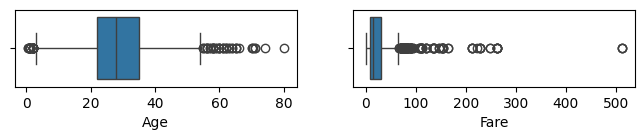

In [23]:
num_cols = df.select_dtypes('number').columns

plt.figure(figsize=(8,1))
for i,col in enumerate(num_cols):
    plt.subplot(1,2, i+1)
    sns.boxplot(df[col] , orient='h')



In [24]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    
    Lower_Bound = Q1-1.5*IQR
    Upper_Bound = Q3 + 1.5*IQR

    lower_outliers = df[df[col]<Lower_Bound][col].values
    upper_outliers = df[df[col]>Upper_Bound][col].values

    df[col] = df[col].replace(lower_outliers , Lower_Bound , inplace=True)
    df[col] = df[col].replace(upper_outliers , Upper_Bound , inplace= True)

    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21884\2525831029.py:12: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df[col] = df[col].replace(lower_outliers , Lower_Bound , inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21884\2525831029.py:13: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series 

In [25]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64

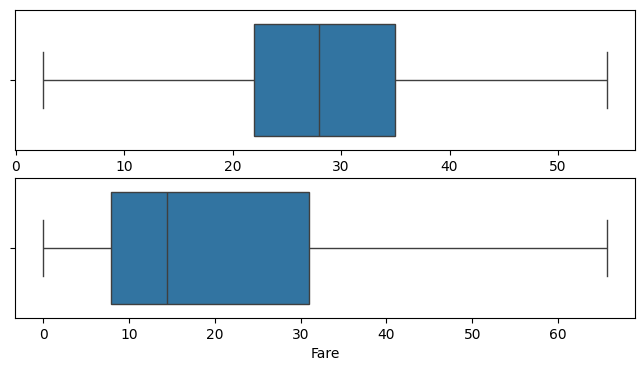

In [26]:
num_cols = df.select_dtypes('number').columns
n = len(num_cols)

plt.figure(figsize=(8, 2 * n))

for i, col in enumerate(num_cols):
    plt.subplot(n, 1, i + 1)
    sns.boxplot(x=df[col], orient='h')


In [27]:
df.duplicated().sum()

np.int64(129)

In [28]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

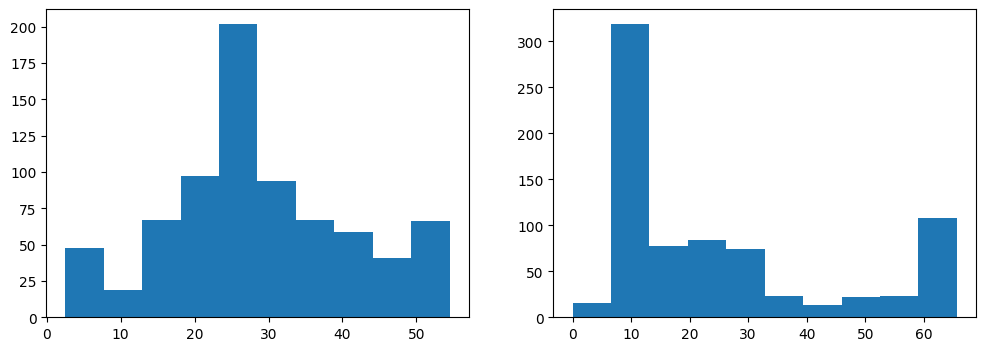

In [29]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(12,4))
for i,col in enumerate(num_cols):
    plt.subplot(1, 2 , i+1)
    plt.hist(df[col])
    
plt.show()

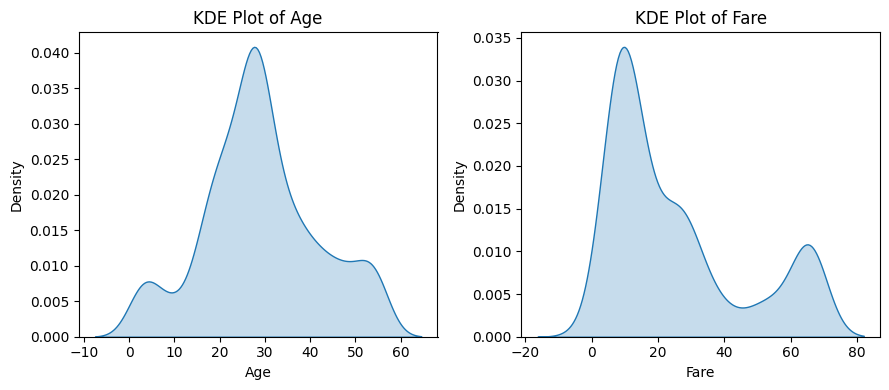

In [30]:
num_cols = df.select_dtypes('number').columns
plt.figure(figsize=(9, 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.kdeplot(df[col], fill=True)
    plt.title(f"KDE Plot of {col}")

plt.tight_layout()
plt.show()


In [31]:
cat_col = df.select_dtypes('category').columns


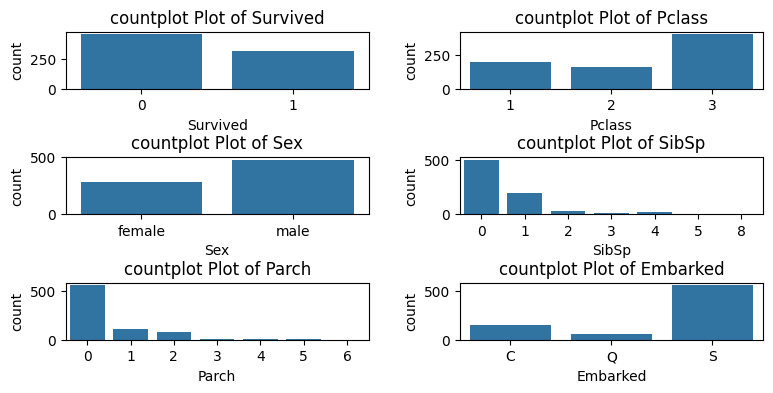

In [32]:
plt.figure(figsize=(9, 4))
for i, col in enumerate(cat_col):
    plt.subplot(3, 2, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f"countplot Plot of {col}")
plt.subplots_adjust(hspace=1.2 , wspace=0.3)
plt.show()


In [33]:
unique = df['Survived'].value_counts()
unique

count = unique.values
categories = unique.index

print(f"{count}\n{categories}")

[449 311]
CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category', name='Survived')


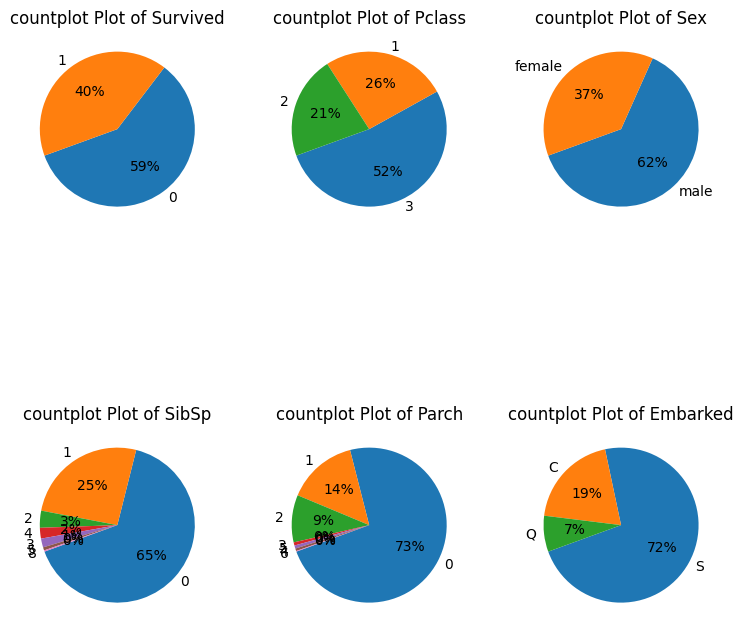

In [34]:
plt.figure(figsize=(9, 8))
for i, col in enumerate(cat_col):
    plt.subplot(2, 3, i+1)
    unique = df[col].value_counts()
    count = unique.values
    categories = unique.index
    plt.pie(count , labels=categories , startangle=200 , autopct="%1.1d%%")
    plt.title(f"countplot Plot of {col}")
plt.subplots_adjust(hspace=.8 , wspace=0.3)
plt.show()


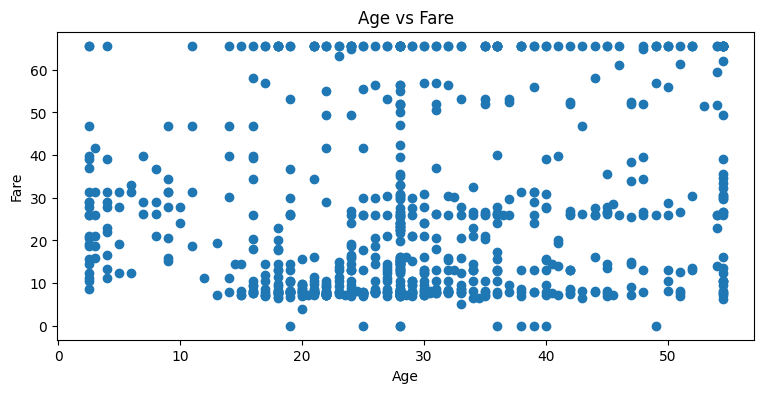

In [35]:
plt.figure(figsize=(9,4))
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()


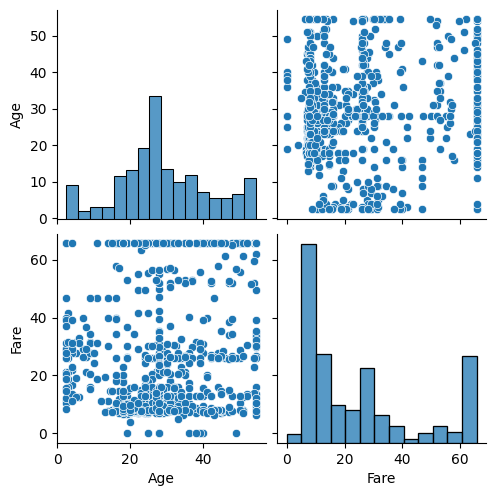

In [36]:
sns.pairplot(df)

In [37]:
df.select_dtypes('number').corr()

,Age,Fare
Age,1.000000,0.148527
Fare,0.148527,1.000000


In [38]:
agg = df.pivot_table(index="Survived" , columns='Sex' , values='Age' , aggfunc=len)
agg

Sex,female,male
Survived,,
0,76,373
1,207,104


<Axes: xlabel='Sex', ylabel='Survived'>

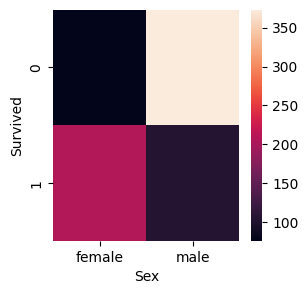

In [39]:
plt.figure(figsize=(3,3))
sns.heatmap(agg)

In [40]:
x = df.drop('Survived', axis= 1)

y = df['Survived']

In [41]:
x 

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,65.6563,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
885,3,female,39.0,0,5,29.1250,Q
887,1,female,19.0,0,0,30.0000,S
888,3,female,28.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [43]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 760, dtype: category
Categories (2, int64): [0, 1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
num_cols = x.select_dtypes('number').columns
scaler = MinMaxScaler()
scaler.fit(x[num_cols])
x[num_cols] = scaler.transform(x[num_cols])

x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,0.375000,1,0,0.110424,S
1,1,female,0.682692,1,0,1.000000,C
2,3,female,0.451923,0,0,0.120704,S
3,1,female,0.625000,1,0,0.808757,S
4,3,male,0.625000,0,0,0.122608,S
...,...,...,...,...,...,...,...
885,3,female,0.701923,0,5,0.443598,Q
887,1,female,0.317308,0,0,0.456925,S
888,3,female,0.490385,1,2,0.357163,S
889,1,male,0.451923,0,0,0.456925,C
